In [ ]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="display: flex; justify-content: center; align-items: center; text-align: center;">
    <img alt="udeA logo" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width: 107px; height: 152px; margin-right: 20px;">
    <div>
        <h2 style="font-size: 28px;"><strong>Práctica #5 : Introducción al análisis frecuencial de señales</strong></h2>
        <p>Sergio Daza Vasquez - 1010082612</p>
        <p>Natalia Arenas Pachón - 1007729698</p>
        <p>Daniel Barrera Mazo - 1045439175</p>
    </div>
</div>
'''))

### **Librerías**

In [117]:
# Librerias a usar a lo largo de la practica
import seaborn as sns
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
# import yasa
import os
# from google.colab import drive
import pandas as pd
from scipy.stats import shapiro , levene, mannwhitneyu
from scipy.stats import kstest, norm
from scipy.signal import detrend
from scipy.signal import find_peaks, get_window
from scipy.signal import welch
from scipy.signal.windows import hann
# drive.mount('/content/drive')

## **Preguntas previas**

### **Representación de señales**

**a)** Compruebe que los valores de las primeras cinco muestras son los mismos

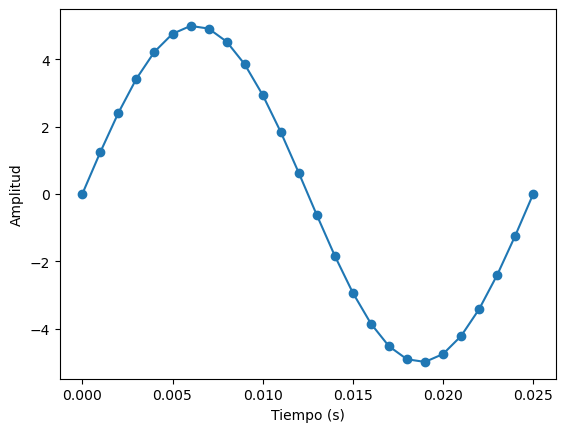

In [2]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

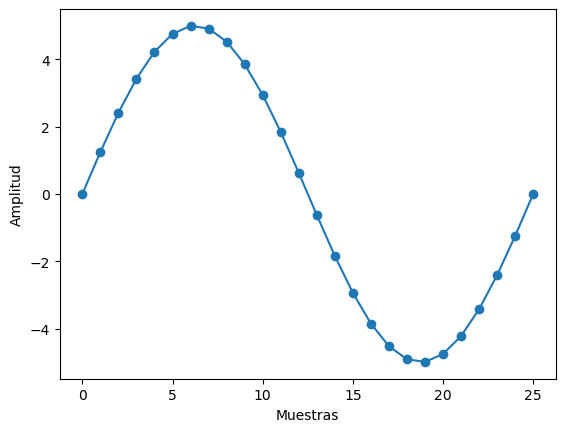

In [3]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

Se comprueba que el valor de las primeras 5 muestras coincide

In [4]:
vector_tcont = x[0:5]
print(vector_tcont)
vector_tdis = x1[0:5]
print(vector_tdis)

for indice, (item1, item2) in enumerate(zip(vector_tcont,vector_tdis)):
  if item1 == item2:
    print(f"{item1} se encuentra en ambas listas en el indice {indice}")
  else:
    print("false")

[0.         1.24344944 2.40876837 3.42273553 4.22163963]
[0.         1.24344944 2.40876837 3.42273553 4.22163963]
0.0 se encuentra en ambas listas en el indice 0
1.243449435824274 se encuentra en ambas listas en el indice 1
2.4087683705085765 se encuentra en ambas listas en el indice 2
3.4227355296434436 se encuentra en ambas listas en el indice 3
4.221639627510076 se encuentra en ambas listas en el indice 4


In [5]:
m = np.equal(vector_tcont,vector_tdis)
print(m)

[ True  True  True  True  True]


Tambien se pueden visualizar las senales mediante un stem

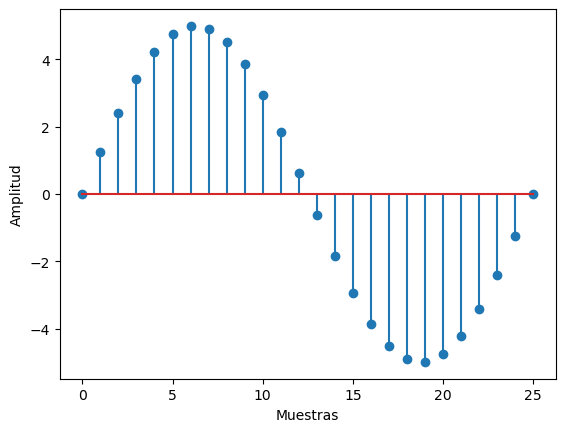

In [6]:
plt.stem(n, x1) 
plt.xlabel('Muestras') 
plt.ylabel('Amplitud') 
plt.show()

## **Energía y potencia en el dominio del tiempo**

**b)** La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

In [7]:
energia_x = sum(x**2)
potencia_x = energia_x/(len(t)-1)
rms = np.sqrt(potencia_x)
t10_x = np.arange(0,10*Tp+T,T)
x10_x = A*np.sin(2*np.pi*Fo*t10_x)
energia10_x = sum(x10_x**2)
potencia10_x = energia10_x/(len(t10_x)-1)
rms10_x = np.sqrt(potencia10_x)

energia_x1 = sum(x1**2) 
potencia_x1 = energia_x1/(len(t)-1) 
rms_x1 = np.sqrt(potencia_x1)
t10_x1 = np.arange(0,10*Tp+T,T)
x10_x1 = A*np.sin(2*np.pi*Fo*t10_x1)
energia10_x1 = sum(x10_x1**2)
potencia10_x1 = energia10_x1/(len(t10_x1)-1)
rms10_x1 = np.sqrt(potencia10_x1)

# Comparación de energía
equal_potencia10 = np.equal(potencia10_x,potencia10_x1)
if equal_potencia10 == True:
  print(equal_potencia10)
  print("La potencia es la misma en x y en x(n)")
else:
  print("La potencia no es la misma en x y en x(n)")

True
La potencia es la misma en x y en x(n)


La potencia promedio es una propiedad inherente a la señal sinusoidal y depende únicamente de la amplitud de la señal. Dado que tanto la señal continua como la discreta tienen la misma amplitud y la señal discreta es una representación fiel de la continua (gracias al muestreo adecuado), la potencia calculada para ambas señales coincide. Esto valida que el proceso de discretización no ha alterado la energía promedio de la señal original, manteniendo así la integridad de las propiedades de potencia.

## **APLICACIÓN**

**4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.

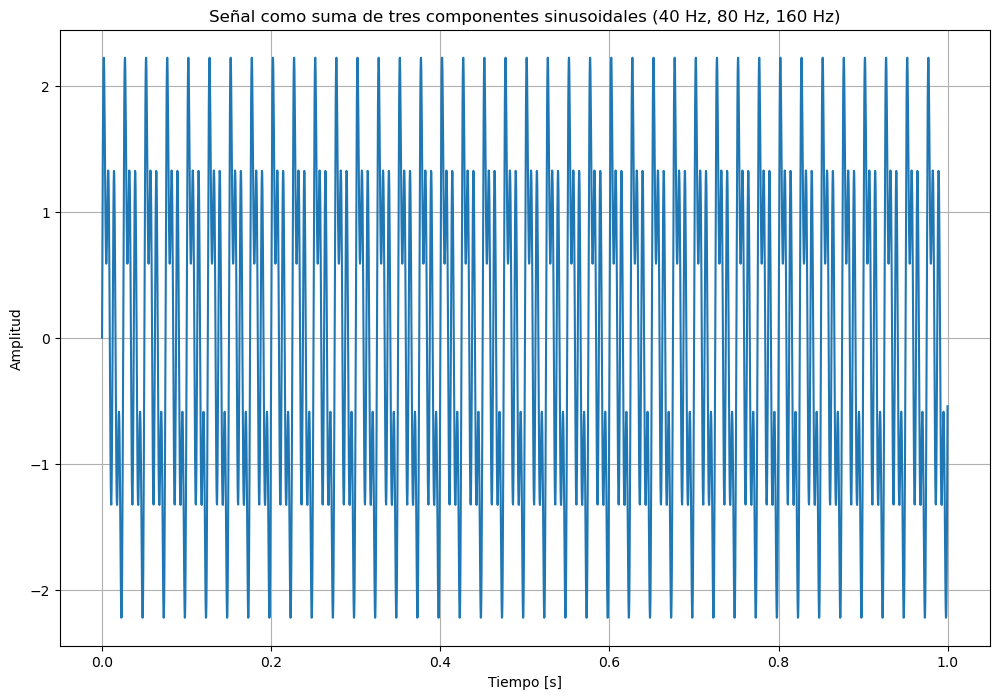

In [16]:
fs = 3200  # Frecuencia de muestreo
t = np.arange(0,1,1/fs) #vector de tiempo de 0 a 1 en pasos de 1/fs

#Frecuencias de las sinusoidales
frecuencias = [40, 80, 160]

#suma de las tres componentes sinusoidales
senal = np.sin(2 * np.pi * frecuencias[0] * t) + np.sin(2 * np.pi * frecuencias[1] * t) + np.sin(2 * np.pi * frecuencias[2] * t)

plt.figure(figsize=(12, 8))
plt.plot(t, senal)
plt.title("Señal como suma de tres componentes sinusoidales (40 Hz, 80 Hz, 160 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


Donde cada ciclo se visualiza:

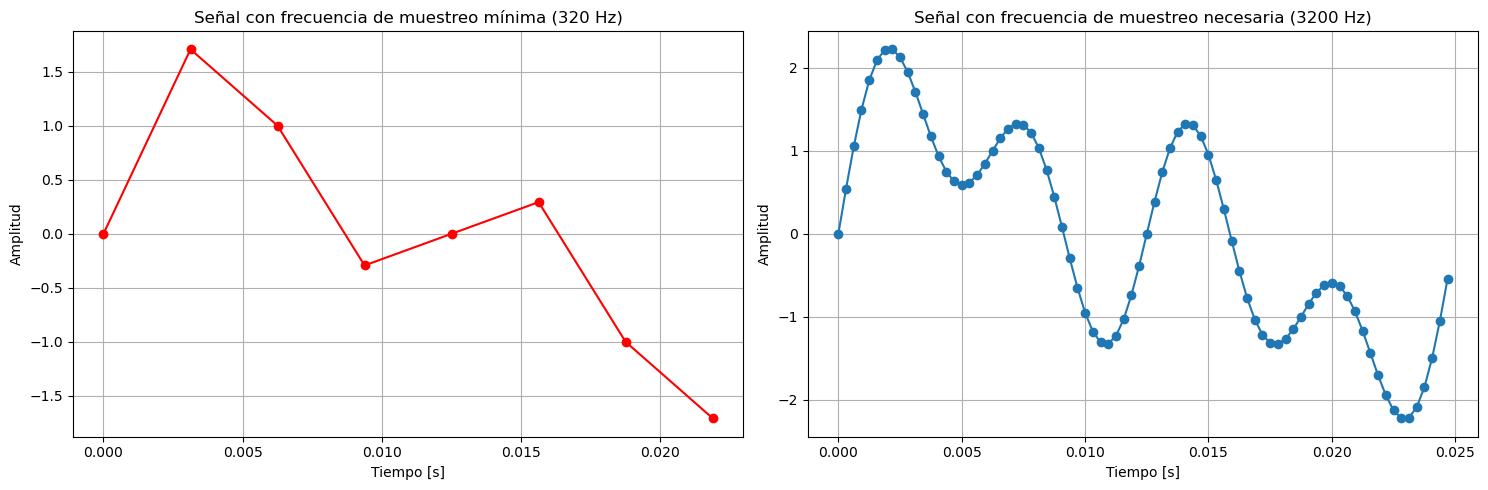

In [17]:
#se razliza una comparación de una frecuencia de muestreo de 360 hz (cumpliendo el teorema de Nyquis)
#y una frecuencia de muestro mayor 3600
frecuencias = [40, 80, 160]

fs_min = 2 * max(frecuencias)  # 320 Hz
Fo = 1/frecuencias[0]
t_min = np.arange(0, Fo, 1/fs_min)

fs_nec = 20 * max(frecuencias)  # 3200 Hz
t_nec = np.arange(0, Fo, 1/fs_nec)

#suma de las tres componentes sinusoidales
senal_min = np.sin(2 * np.pi * frecuencias[0] * t_min) + np.sin(2 * np.pi * frecuencias[1] * t_min) + np.sin(2 * np.pi * frecuencias[2] * t_min)

#suma de las tres componentes sinusoidales
senal_nec = np.sin(2 * np.pi * frecuencias[0] * t_nec) + np.sin(2 * np.pi * frecuencias[1] * t_nec) + np.sin(2 * np.pi * frecuencias[2] * t_nec)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#Gráfico con la frecuencia de muestreo mínima
ax1.plot(t_min, senal_min, marker='o', color='red', label='Mínimo Fs')
ax1.set_title('Señal con frecuencia de muestreo mínima (320 Hz)')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(True)
# Gráfico con la frecuencia de muestreo ideal
ax2.plot(t_nec, senal_nec, marker='o')
ax2.set_title('Señal con frecuencia de muestreo necesaria (3200 Hz)')
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Amplitud')
ax2.grid(True)

plt.tight_layout()
plt.show()

En la figura obtenida se evidencia la suma de tres componentes sinusoidales con frecuencias diferentes (40, 80 y 160 Hz). Ademas se utilizó una frecuencia de muestreo de 3200 Hz, que es mayor que el mínimo requerido según el teorema de Nyquist o tambien conocido como teorema de muestreo [1], que establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia más alta en la señal (320 Hz en este caso) (fm>2*160). Para este caso la frecuencia de muestreo mínima no es suficientemente detallada, por lo que se hace necesario tomar una frecuencia necesaria 20 veces la frecuencia mayor, esto con el fin de evitar el aliasing o submuesteo y permite capturar las componentes de alta frecuencia, con una mayor resolución.

**4.2** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos
de la señal)

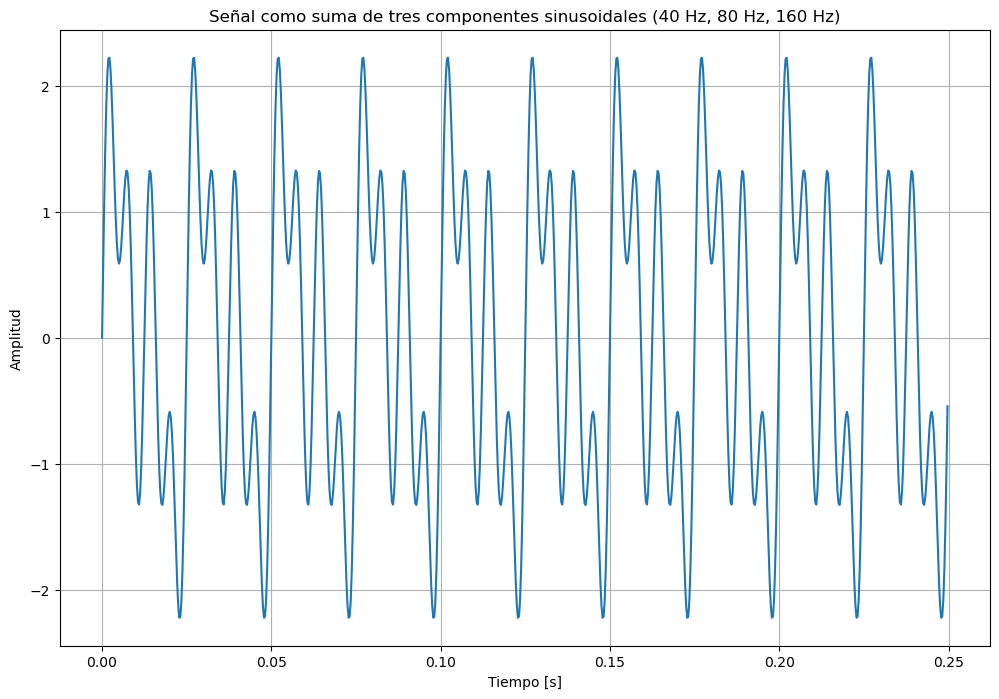

In [18]:
fs = 3200  # Frecuencia de muestreo
Fo = 40  # Frecuencia fundamental de la señal
t_10 = np.arange(0, 10/Fo, 1/fs)  # Vector de tiempo para 10 periodos de la frecuencia fundamental

# Frecuencias de las componentes sinusoidales
frecuencias = [40, 80, 160]

# Suma de tres componentes sinusoidales (usando el mismo vector de tiempo t_10)
senal_10 = np.sin(2 * np.pi * frecuencias[0] * t_10) + np.sin(2 * np.pi * frecuencias[1] * t_10) + np.sin(2 * np.pi * frecuencias[2] * t_10)

# Gráfico de la señal para 10 periodos
plt.figure(figsize=(12, 8))
plt.plot(t_10, senal_10)
plt.title("Señal como suma de tres componentes sinusoidales (40 Hz, 80 Hz, 160 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

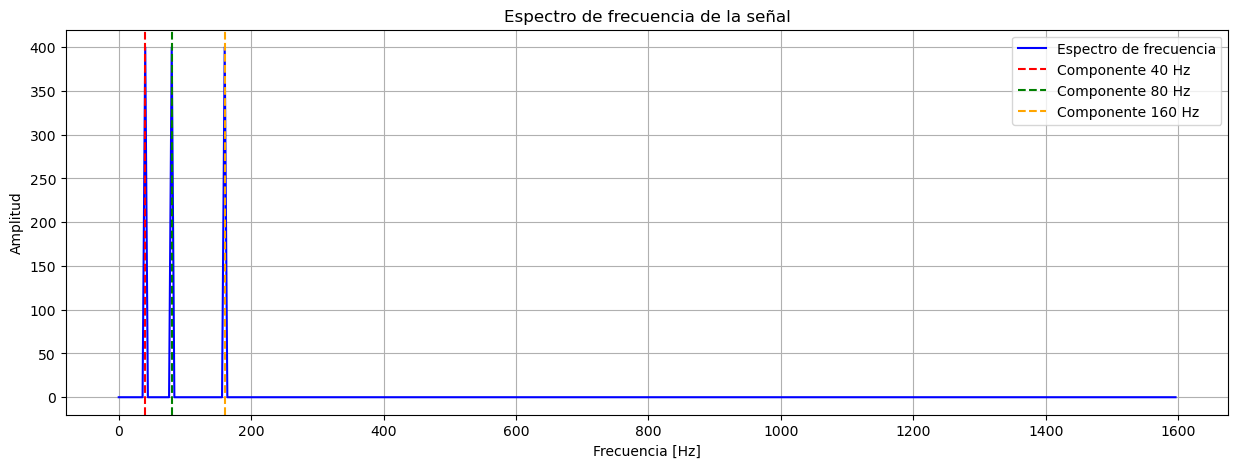

In [19]:
N = len(senal_10)
fft_senal = np.fft.fft(senal_10) #Transformada Rápida de Fourier (FFT)
frecuencias_fft = np.fft.fftfreq(N, 1 / fs)

# Solo tomamos la mitad positiva del espectro
Nmitad = N // 2
Xsenalmitad = fft_senal[:Nmitad]
Fmitad = frecuencias_fft[:Nmitad]

# Gráfica del espectro de frecuencia
plt.figure(figsize=(15, 5))
plt.plot(Fmitad, np.abs(Xsenalmitad), color='blue', label='Espectro de frecuencia')
plt.title('Espectro de frecuencia de la señal')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)

# Frecuencias de las componentes
col = ['red', 'green', 'orange']
for f, color in zip(frecuencias, col):
    plt.axvline(x=f, color=color, linestyle='--', label=f'Componente {f} Hz')

plt.legend()
plt.show()

Aproximación a las frecuencias de interes

Frecuencias de los picos encontrados: [ 40.  80. 160.]
Amplitudes de los picos encontrados: [400. 400. 400.]


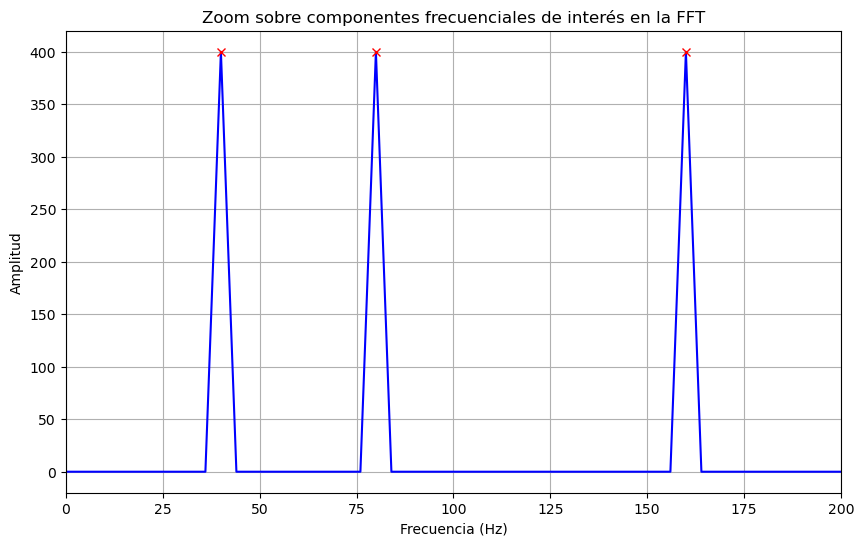

In [24]:
peaks, _ = find_peaks(abs(Xsenalmitad), height=300)
print("Frecuencias de los picos encontrados:", Fmitad[peaks])
print("Amplitudes de los picos encontrados:", abs(Xsenalmitad[peaks]))

# Gráfico con más zoom sobre las frecuencias de interés
plt.figure(figsize=(10, 6))
plt.plot(Fmitad, abs(Xsenalmitad), color='blue')
plt.title('Zoom sobre componentes frecuenciales de interés en la FFT')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.xlim(0, 200)
plt.plot(Fmitad[peaks], abs(Xsenalmitad[peaks]), "x", color='red')
plt.show()

El espectro de frecuencia que muestras corresponde a la señal sumada de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz, lo que se refleja en los picos claramente definidos en estas frecuencias. La amplitud de cada uno de estos picos es de 400, lo que es coherente con la amplitud de las componentes sinusoidales en el dominio del tiempo, ya que todas tienen la misma magnitud. Esto confirma que las tres componentes se han combinado de manera equilibrada para formar la señal. El uso de una frecuencia de muestreo alta, como los 3200 Hz, permitió capturar con precisión cada una de estas frecuencias, evitando aliasing y proporcionando una buena resolución en el dominio de la frecuencia. La transformada de Fourier aplicada ha permitido observar estas frecuencias principales, demostrando que la señal ha sido muestreada y analizada de manera adecuada. Los picos de amplitud iguales indican que cada componente sinusoidal contribuye de manera equivalente a la señal total.

**4.3** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior

**Bibliografía:** https://programacionpython80889555.wordpress.com/2023/12/06/aplicando-la-transformada-de-fourier-en-python-con-numpy/

Para hacer la transformada inversa de Fourier se hace uso del comando de la librería Numpy:

```
numpy.fft.ifft(transformada de fourier)
```

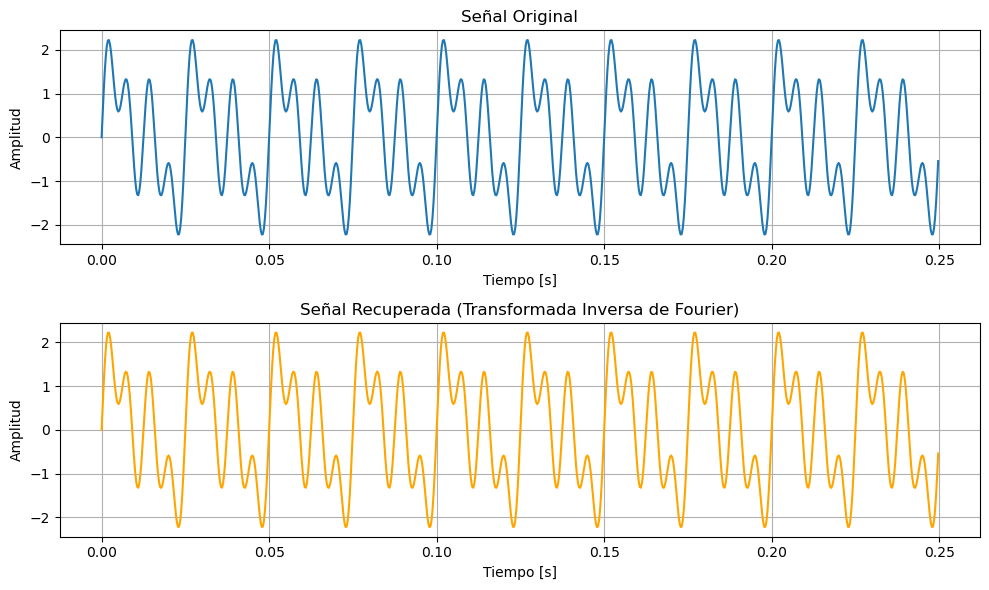

In [20]:
# Con la funcion investigada np.fft.ifft() se calcula la Transformada Inversa de Fourier de la señal
senal_recuperada = np.fft.ifft(np.fft.fft(senal_10))

plt.figure(figsize=(10, 6))

#para realizar una comparacion visual se grafica la señal recuperada(con ifft) y la señal original
plt.subplot(2, 1, 1)
plt.plot(t_10, senal_10, label="Señal Original") #Señal original
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal recuperada
plt.subplot(2, 1, 2)
plt.plot(t_10, np.real(senal_recuperada), label="Señal Recuperada", color='orange') # Señal con ifft
plt.title("Señal Recuperada (Transformada Inversa de Fourier)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()

plt.show()

En los gráficos presentados, se observa la comparación entre la señal original y la señal recuperada mediante la Transformada Inversa de Fourier (IFFT). Ambas señales muestran un comportamiento identico, lo que indica que la señal ha sido recuperada exitosamente del dominio de la frecuencia al dominio del tiempo. La señal recuperada sigue la misma forma de onda, con las mismas oscilaciones y amplitud que la señal original, lo cual es un indicio de que la FFT y la IFFT han preservado correctamente la información de la señal.

**4.4** ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```

**-->** Extraiga de manera similar cada una de las componentes de la señal.

Si, el codigo corresponde a la aplican de un filtro debido a:
* En la primera línea se calcula la transformada de Fourier de la señal x, lo que convierte la señal del dominio del tiempo a frecuencia.
* En la segunda línea F2 tiene la misma longitud (tamaño) que F1, pero con ceros. Luego,  en la línea siguiente F2[9:13] = F1[9:13] hace que se eliminen las frecuencias establecidas fuera de estos rangos (es decir, las deja como ceros). Este proceso de retener solo ciertas frecuencias (las que se incluyen en F2) se asemeja a lo que hace un filtro pasa-banda.
* Finalmente en la cuarta línea del código, se calcula la transformada inversa de Fourier de F2, que devuelve la señal al dominio del tiempo que contiene solo las frecuencias en el rango especificado, lo que se traduce en un filtrado de la señal x.

/var/folders/gp/4kb5kc0x1rz8s1jrbg6czttm0000gn/T/ipykernel_59481/528876583.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[peaks[0]] = F1[peaks[0]]


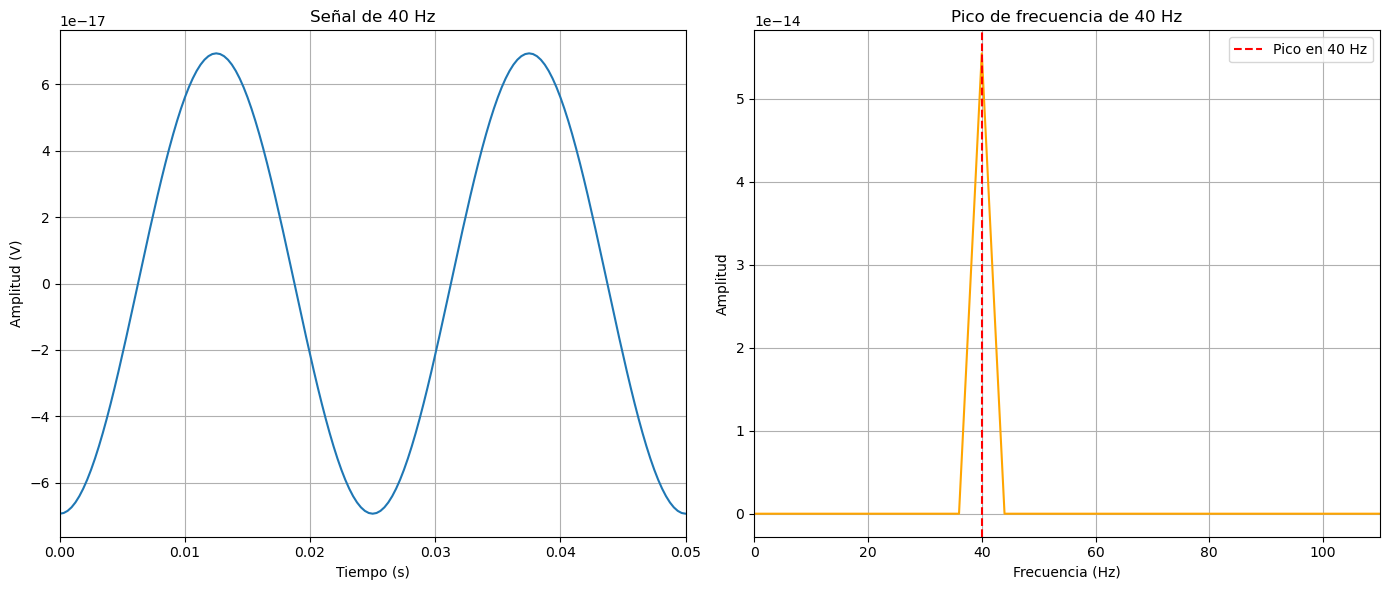

In [34]:
#Para 40 Hz
F1 = np.fft.fft(senal_10);
F2 = np.zeros((len(F1)));
F2[peaks[0]] = F1[peaks[0]]
xr = np.fft.ifft(F2);

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de la señal filtrada (40 Hz)
axs[0].plot(t_10, np.real(xr))
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud (V)')
axs[0].set_title('Señal de 40 Hz')
axs[0].grid()

# Calcular la transformada de Fourier de la señal filtrada
F2 = np.fft.fft(xr)
N = len(xr)
k = np.arange(0, N)
Fs = 3200
F = (k * Fs) / N

# Gráfica del pico de frecuencia de 40 Hz
axs[1].plot(F, abs(F2), color='orange')
axs[1].set_title('Pico de frecuencia de 40 Hz')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud')
axs[1].set_xlim(0, 110)
axs[1].grid()

# Añadir línea vertical en 160 Hz
axs[1].axvline(x=40, color='red', linestyle='--', label='Pico en 40 Hz')

# Agregar leyenda
axs[1].legend()

axs[0].set_xlim(0, 0.05)
plt.tight_layout()
plt.show()

/var/folders/gp/4kb5kc0x1rz8s1jrbg6czttm0000gn/T/ipykernel_59481/331972223.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[peaks[1]] = F1[peaks[1]]


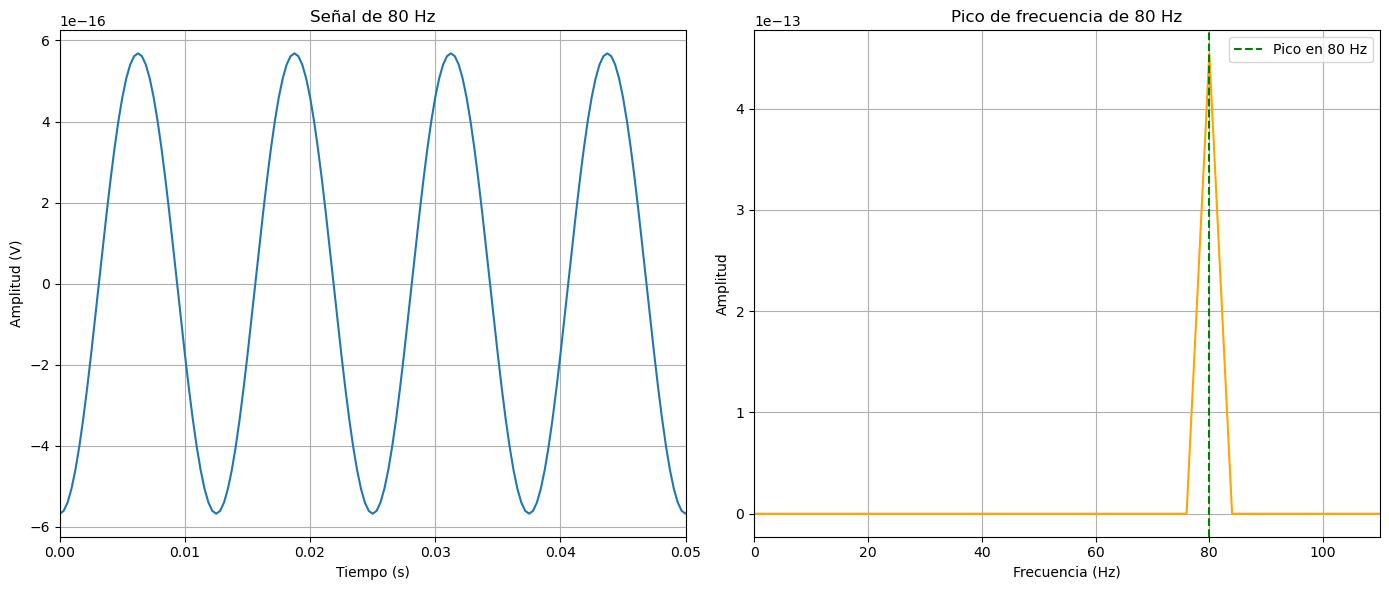

In [33]:
#Para 80 Hz
F1 = np.fft.fft(senal_10);
F2 = np.zeros((len(F1)));
F2[peaks[1]] = F1[peaks[1]]
xr = np.fft.ifft(F2);

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de la señal filtrada (80 Hz)
axs[0].plot(t_10, np.real(xr))
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud (V)')
axs[0].set_title('Señal de 80 Hz')
axs[0].grid()

# Calcular la transformada de Fourier de la señal filtrada
F2 = np.fft.fft(xr)
N = len(xr)
k = np.arange(0, N)
Fs = 3200
F = (k * Fs) / N

# Gráfica del pico de frecuencia de 80 Hz
axs[1].plot(F, abs(F2), color='orange')
axs[1].set_title('Pico de frecuencia de 80 Hz')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud')
axs[1].set_xlim(0, 110)
axs[1].grid()

# Añadir línea vertical en 160 Hz
axs[1].axvline(x=80, color='green', linestyle='--', label='Pico en 80 Hz')

# Agregar leyenda
axs[1].legend()

axs[0].set_xlim(0, 0.05)
plt.tight_layout()
plt.show()

/var/folders/gp/4kb5kc0x1rz8s1jrbg6czttm0000gn/T/ipykernel_59481/2556206315.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[peaks[2]] = F1[peaks[2]]


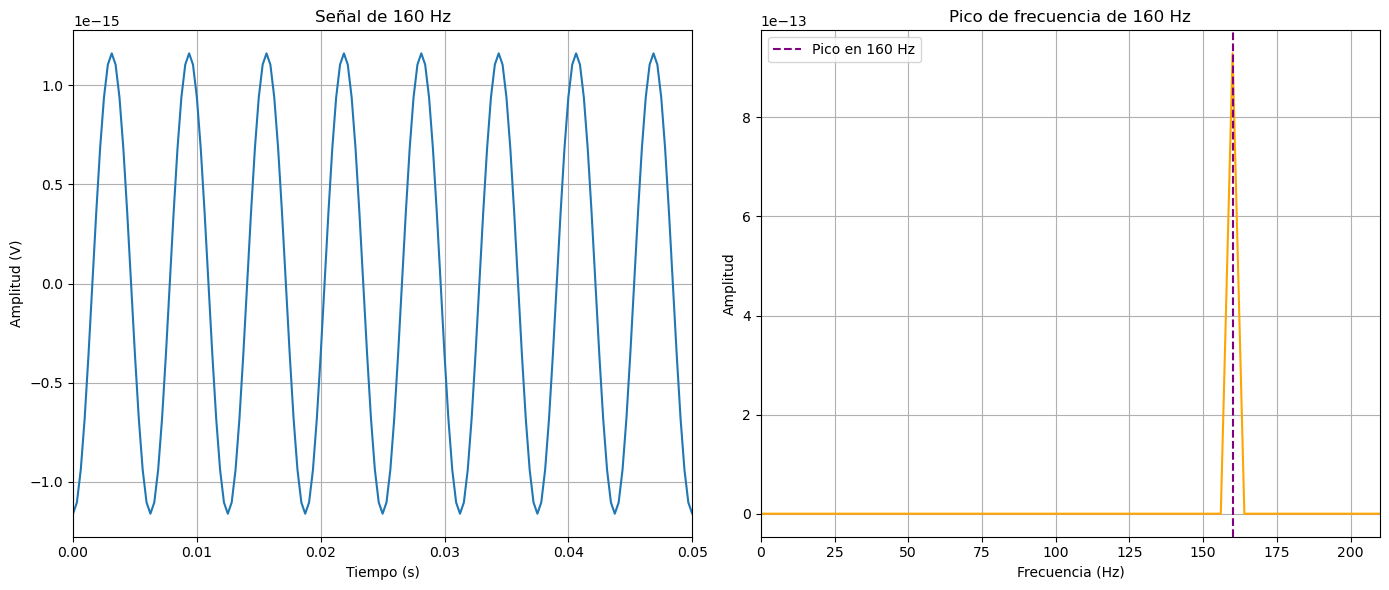

In [32]:
#Para 160 Hz
F1 = np.fft.fft(senal_10);
F2 = np.zeros((len(F1)));
F2[peaks[2]] = F1[peaks[2]]
xr = np.fft.ifft(F2);

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de la señal filtrada (160 Hz)
axs[0].plot(t_10, np.real(xr))
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud (V)')
axs[0].set_title('Señal de 160 Hz')
axs[0].grid()

# Calcular la transformada de Fourier de la señal filtrada
F2 = np.fft.fft(xr)
N = len(xr)
k = np.arange(0, N)
Fs = 3200
F = (k * Fs) / N

# Gráfica del pico de frecuencia de 160 Hz
axs[1].plot(F, abs(F2), color='orange')
axs[1].set_title('Pico de frecuencia de 160 Hz')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud')
axs[1].set_xlim(0, 210)
axs[1].grid()

# Añadir línea vertical en 160 Hz
axs[1].axvline(x=160, color='purple', linestyle='--', label='Pico en 160 Hz')

# Agregar leyenda
axs[1].legend()

axs[0].set_xlim(0, 0.05)
plt.tight_layout()
plt.show()

Los gráficos correspondientes a las frecuencias de 40 Hz, 80 Hz y 160 Hz muestran que el filtrado ha sido exitoso en extraer cada una de las componentes sinusoidales de la señal original. En el dominio del tiempo, se observan ondas sinusoidales puras, con frecuencias de oscilación que aumentan progresivamente desde 40 Hz, pasando por 80 Hz hasta 160 Hz, lo cual es coherente con las frecuencias originales de la señal. En el dominio de la frecuencia, los espectros muestran picos claros y bien definidos en 40 Hz, 80 Hz y 160 Hz, confirmando que cada una de estas frecuencias ha sido aislada correctamente. En todos los casos, las otras frecuencias han sido eliminadas, validando que el proceso de filtrado ha funcionado de forma precisa y efectiva.

**4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de
muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas
de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que
se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de
Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning,
y justificar la elección del solapamiento y el ancho de la ventaja)

In [37]:
#se carga el archivo
data = sio.loadmat('senecg.mat')
# print(data)


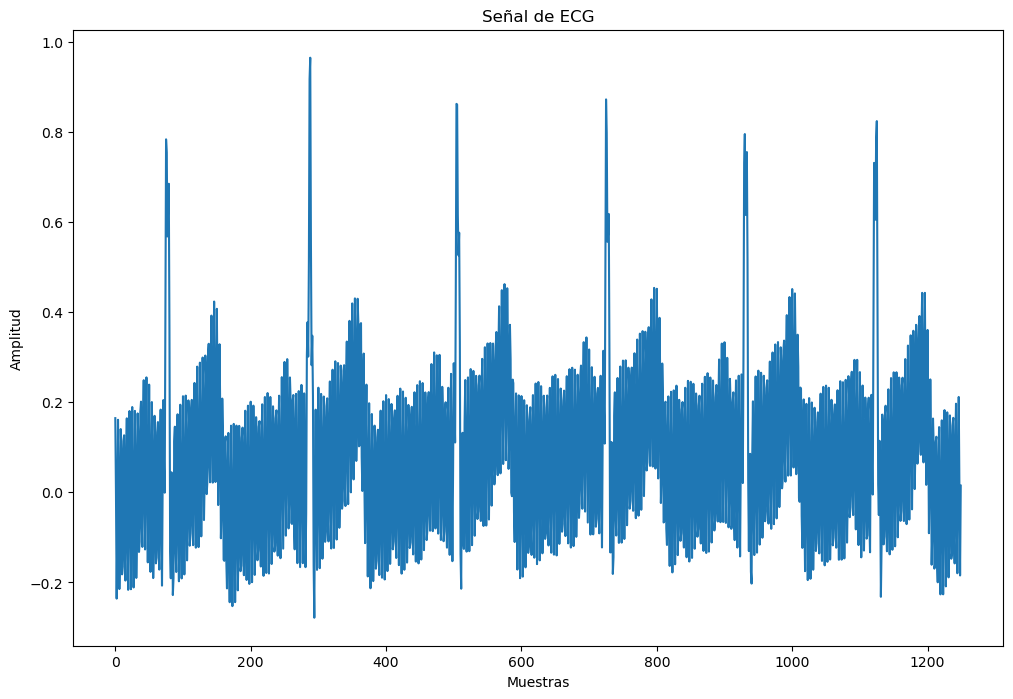

In [40]:
señal_ecg = data['ECG'] # ECG nombre de la variable que contiene el array de la senal
plt.figure(figsize=(12,8))
plt.plot(señal_ecg)
plt.title('Señal de ECG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

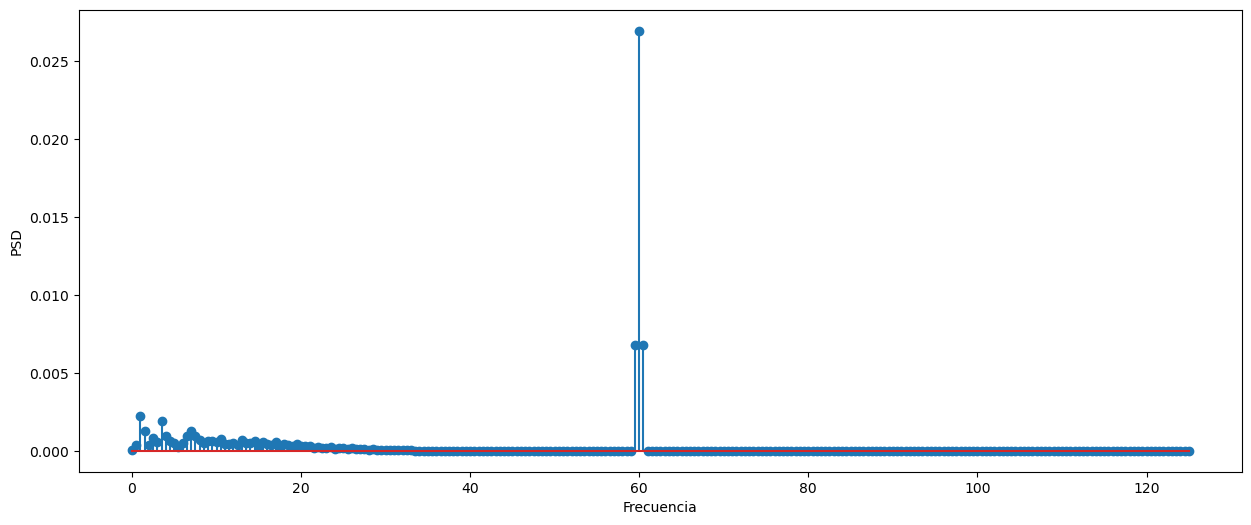

In [43]:
ecg = señal_ecg[:,0]
fs = 250
window_size = 500 # Tamaño de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%
window = hann(window_size)  # Utiliza una ventana de Hann

# Ahora se calcula el periodograma de Welch
f, pxx = welch(ecg, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

plt.figure(figsize=(15,6))
plt.stem(f, pxx)
plt.xlabel('Frecuencia')
plt.ylabel('PSD')
plt.show()

Se seleccionó una ventana de 500 muestras para realizar el análisis en frecuencia, ya que, con un total de 1200 muestras disponibles, esta longitud de ventana proporciona un equilibrio adecuado entre la resolución en frecuencia y la capacidad para capturar variaciones relevantes en la señal. Una ventana más pequeña podría perder detalles importantes, mientras que una más grande reduciría la resolución temporal [3]. Además, se utilizó un solapamiento del 50%, una elección común en el análisis de señales biológicas, porque permite suavizar las transiciones entre ventanas consecutivas y mejorar la estimación espectral sin introducir una redundancia excesiva [4]. Este nivel de solapamiento es eficiente para este tipo de señales, donde se busca captar patrones repetitivos y eliminar posibles ruidos sin comprometer la precisión del análisis.

En la figura del periodograma de Welch obtenido para la señal de ECG evidencia una clara concentración de potencia en torno a los 60 Hz, lo que indica la presencia de interferencia de la red eléctrica. Este tipo de artefacto es común en la adquisición de señales biomédicas, dado que la mayoría de los sistemas eléctricos operan a 60 Hz, interfiriendo con las señales ECG, cuyas frecuencias de interés suelen estar por debajo de este umbral. Por esta razón, es necesario filtrar las frecuencias superiores a 58 Hz, eliminando el ruido de la red eléctrica sin afectar las frecuencias relevantes para el análisis clínico del ECG. Esto permitirá obtener una señal más limpia y representativa del comportamiento cardíaco real.

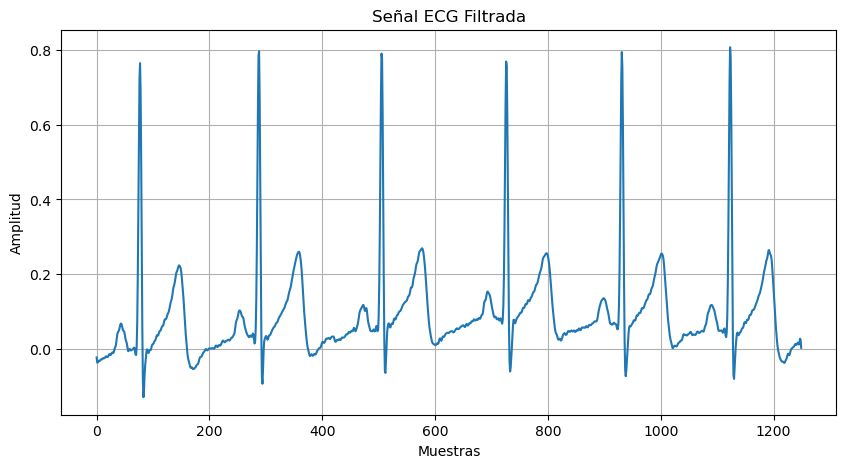

In [47]:
# Parámetros
fs = 250  # Frecuencia de muestreo
filtro_frec = 58  # Frecuencia de corte para el filtrado

# Señal ECG
señal_ecg = data['ECG'][:, 0]

# Transformada de Fourier
fft_ecg = np.fft.fft(señal_ecg)
frecuencias = np.fft.fftfreq(len(fft_ecg), 1/fs) # Frecuencias asociadas a la FFT

# Se eliminan las frecuencias mayores a 58 Hz
fft_ecg_filtrada = np.where(np.abs(frecuencias) > filtro_frec, 0, fft_ecg)

# Transformada inversa para recuperar la señal filtrada
ecg_filtrada = np.fft.ifft(fft_ecg_filtrada)

# Visualizacion de la señal filtrada
plt.figure(figsize=(10, 5))
plt.plot(np.real(ecg_filtrada))
plt.title('Señal ECG Filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

La señal original de ECG contenía interferencias, principalmente ruido de 60 Hz, que es comúnmente generado por las fuentes eléctricas. Al aplicar el filtrado, eliminamos las frecuencias por encima de 58 Hz, limpiando la señal sin afectar las componentes más bajas que contienen la información importante del ECG, como las ondas P, QRS y T. Este proceso es importante para obtener una señal más clara y precisa que facilite el análisis clínico y de diagnóstico, eliminando el ruido que podría distorsionar o dificultar la identificación de los eventos cardíacos clave.

Ahora se realiza nuevamente el periodograma de welch para observar la densidad espectral de potencia de las componentes frecuenciales de la senal filtrada.

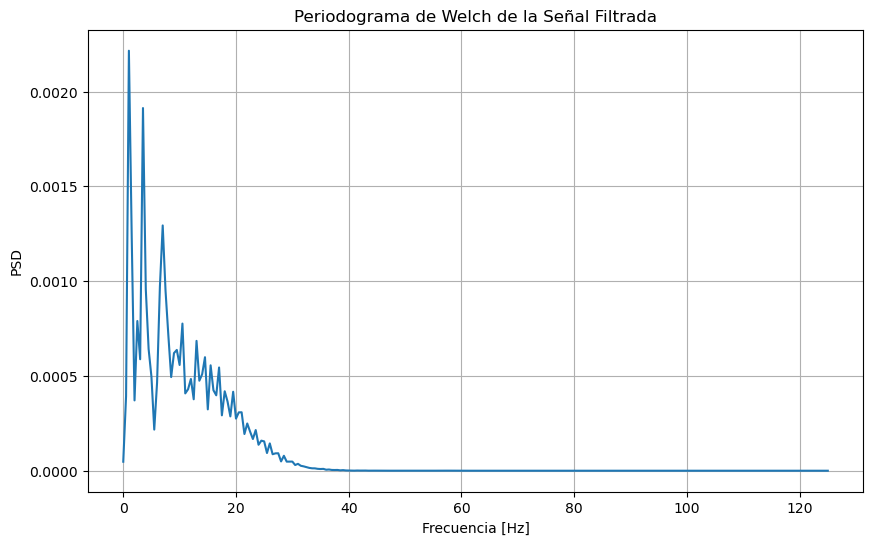

In [155]:
# Parámetros del periodograma de Welch
fs = 250  # Frecuencia de muestreo
window_size = 500  # Tamaño de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%
window = np.hanning(window_size)  # Ventana de Hanning

# Periodograma de Welch a la señal filtrada
f, pxx_filtrada = welch(np.real(ecg_filtrada), fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Visualizacion
plt.figure(figsize=(10, 6))
plt.plot(f, pxx_filtrada) 
plt.title('Periodograma de Welch de la Señal Filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

En este caso, las principales componentes de potencia se concentran en frecuencias bajas, principalmente por debajo de los 40 Hz, lo que es característico de las señales de ECG, donde las ondas fisiológicas más importantes, como las ondas P, QRS y T, están asociadas a frecuencias bajas [5]. Estas frecuencias corresponden a la actividad eléctrica del corazón: la onda P refleja la despolarización auricular, el complejo QRS representa la despolarización ventricular, y la onda T se asocia a la repolarización ventricular [5]. El hecho de que la mayoría de la energía se concentre en este rango confirma que las componentes esenciales de la señal ECG han sido preservadas tras el filtrado. Además, la ausencia de picos significativos en torno a los 60 Hz indica que el ruido de la red eléctrica ha sido eliminado con éxito. 

**4.6** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG
de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al
azar. Realice un análisis comparativo de las señales según lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el
ancho de la ventaja)

Se toman senales aleatorias de un sujeto Sano (Control) y un sujeto con Parkinson.

In [119]:
# Senal EEG, sujeto Control
data_control = sio.loadmat('data/control/C004_EP_reposo.mat')
# Senal EEG, sujeto Parkinson
data_parkinson = sio.loadmat('data/parkinson/P004_EP_reposo.mat')

# Se extraen las señales de los sujetos
signal_control = data_control['data']
signal_parkinson = data_parkinson['data']

Se realiza un reshape a las senales para poder trabajarlas

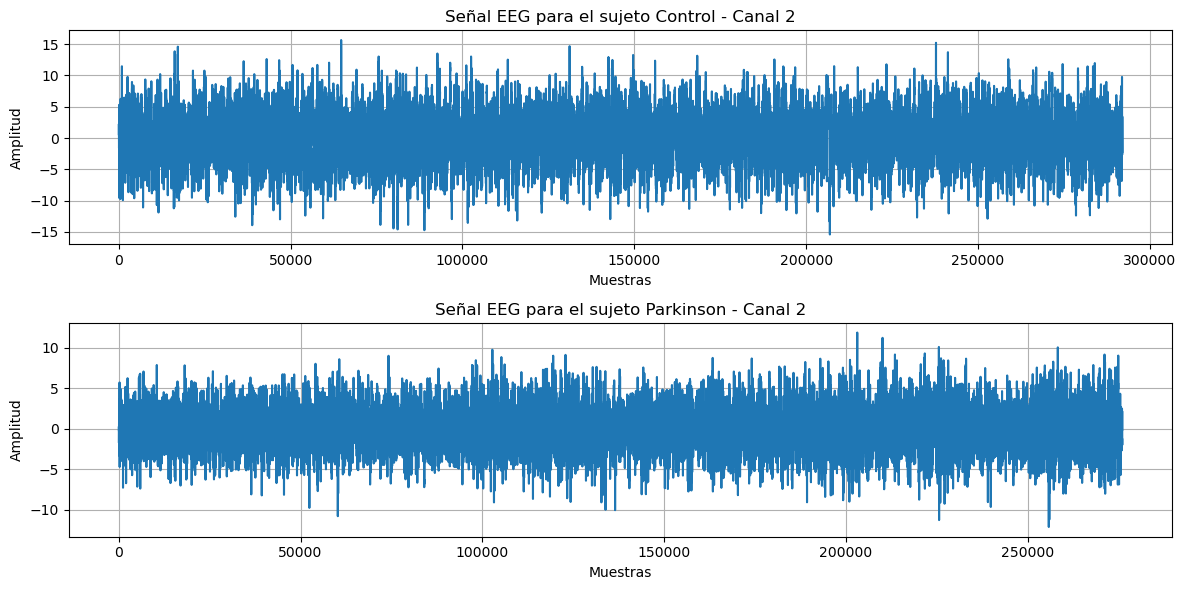

In [121]:
canales_control, puntos_control, epocas_control = signal_control.shape
canales_parkinson, puntos_parkinson, epocas_parkinson = signal_parkinson.shape

# Se hace el reshape y se toma el canal 2 para ambas senales
control_eeg = np.reshape(signal_control, (canales_control, puntos_control*epocas_control), order='F')[2]
parkinson_eeg = np.reshape(signal_parkinson, (canales_parkinson, puntos_parkinson*epocas_parkinson), order='F')[2]

# Se grafica para el sujeto Control
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(control_eeg)
plt.title('Señal EEG para el sujeto Control - Canal 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()

# Se grafica para el sujeto Parkinson
plt.subplot(2, 1, 2)
plt.plot(parkinson_eeg)
plt.title('Señal EEG para el sujeto Parkinson - Canal 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()


In [152]:
print(len(control_eeg))
print(len(parkinson_eeg))

292000
276000


A modo de visualizar mejor la dinamica de las senales, se hace un recorte de la cantidad de muestras. Esto es solo para una mejor visualizacion.

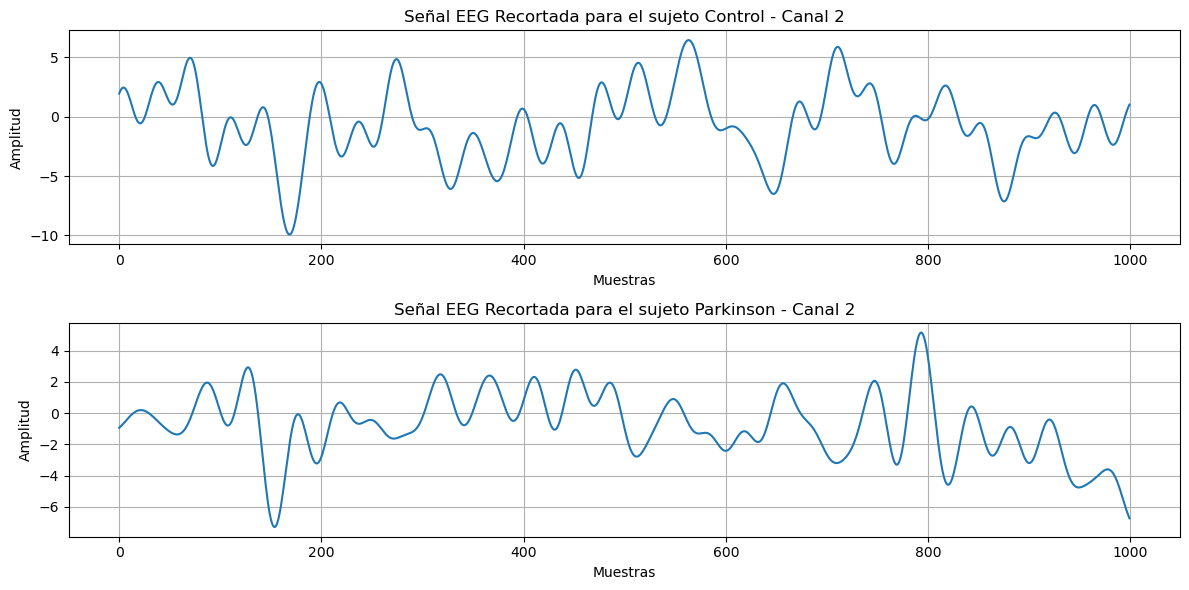

In [123]:
# Rango de muestras a visualizar
start_sample = 1000
end_sample = 2000

# Recortar las señales
control_eeg_recortada = control_eeg[start_sample:end_sample]
parkinson_eeg_recortada = parkinson_eeg[start_sample:end_sample]

# Graficacion para sujeto control
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(control_eeg_recortada)
plt.title('Señal EEG Recortada para el sujeto Control - Canal 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()

# Graficacion para sujeto parkinson
plt.subplot(2, 1, 2)
plt.plot(parkinson_eeg_recortada)
plt.title('Señal EEG Recortada para el sujeto Parkinson - Canal 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

Ahora se realiza el analisis frecuencial a traves del periodograma de Welch para ambas senales

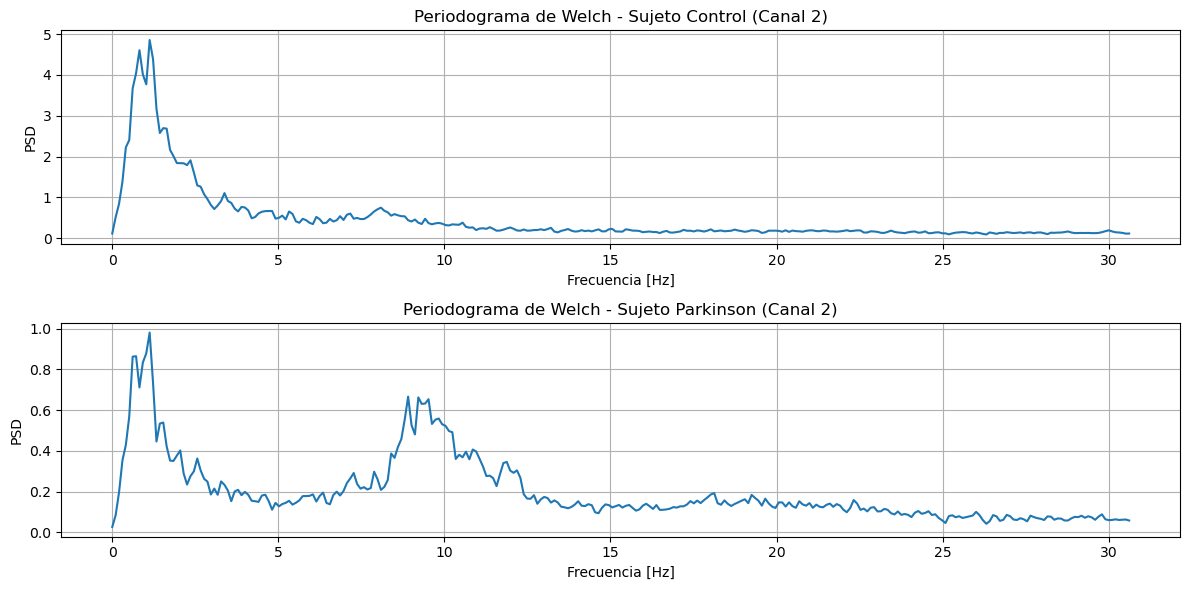

In [150]:
# Se definen los parametros para el periodograma de Welch
fs = 1024 #Frecuencia de muestreo de las señales EEG
window_size = 10000 #Tamaño de la ventana Hanning 
overlap = window_size // 2  # Solapamiento del 50%
window = hann(window_size)  # ventana de Hann

# Se aplica el periodograma de Welch a la señal del sujeto Control
f_control, pxx_control = welch(control_eeg, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se aplica el periodograma de Welch a la señal del sujeto Parkinson
f_parkinson, pxx_parkinson = welch(parkinson_eeg, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se grafican los periodogramas
plt.figure(figsize=(12, 6))

# Sujeto control
plt.subplot(2, 1, 1)
plt.plot(abs(f_control[0:300]), pxx_control[0:300])
plt.title('Periodograma de Welch - Sujeto Control (Canal 2)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid()

# Parkinson
plt.subplot(2, 1, 2)
plt.plot(abs(f_parkinson[0:300]), pxx_parkinson[0:300])
plt.title('Periodograma de Welch - Sujeto Parkinson (Canal 2)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid()

plt.tight_layout()
plt.show()

El tamaño de la ventana de Hanning de 10000 muestras permite obtener una alta resolución en frecuencia (~0.1 Hz), ideal para analizar los ritmos cerebrales de baja frecuencia típicos en señales EEG. El solapamiento del 50% proporciona un buen equilibrio entre suavizar el espectro de potencia y mantener un buen detalle temporal en las señales EEG, permitiendo detectar tanto las fluctuaciones lentas como rápidas en la actividad cerebral. Ademas, un solapamiento del 50% por ser un solapamiento típico utilizado en este tipo de aplicaciones [6]

El análisis frecuencial mediante el periodograma de Welch muestra diferencias claras en la densidad espectral de potencia (PSD) entre el sujeto control y el paciente con Parkinson. En el sujeto control, la mayor parte de la potencia está concentrada en las frecuencias bajas, principalmente en la banda delta (0.5-4 Hz) y theta (4-8 Hz), lo que es típico en un estado de reposo y refleja una actividad cerebral normal [7]. Sin embargo, en el paciente con Parkinson, aunque también se observa potencia en estas bandas, aparece un aumento notable en la banda beta (13-30 Hz). Este incremento en la potencia beta es característico de la fisiopatología de la enfermedad de Parkinson y se asocia con síntomas motores como el temblor y la rigidez, relacionados con la hipersincronización neuronal en los circuitos cerebrales afectados, como los ganglios basales [8]. La PSD refleja cómo se distribuye la energía de la señal EEG en diferentes frecuencias, y en este caso, evidencia una disfunción neurológica en el paciente con Parkinson. 

# **Conclusiones**

A lo largo del trabajo, se han abordado dos tipos de análisis de señales biomédicas: las señales ECG y EEG, utilizando herramientas de análisis frecuencial como la transformada de Fourier y el periodograma de Welch. Ambos enfoques han permitido extraer información valiosa sobre la naturaleza de las señales y sus componentes frecuenciales, lo que resulta esencial tanto para la comprensión fisiológica como para el diagnóstico clínico.

En el análisis de la señal ECG, el filtrado y posterior análisis frecuencial permitieron eliminar el ruido de 60 Hz, típico de interferencias eléctricas, preservando las componentes más importantes de la señal, que corresponden a las ondas P, QRS y T. Este proceso de filtrado es crucial, ya que las señales cardiacas deben estar limpias de artefactos para una adecuada interpretación clínica [4]. El análisis de la densidad espectral de potencia mostró cómo la mayor parte de la energía de la señal ECG se concentra en frecuencias por debajo de los 40 Hz, lo cual es fisiológicamente coherente con los ritmos cardíacos. Este tipo de análisis es esencial en estudios de cardiología, donde una señal precisa puede marcar la diferencia en la identificación de anomalías cardíacas [5].

Por otro lado, en el análisis de las señales EEG de un sujeto sano y un paciente con Parkinson, el uso del periodograma de Welch permitió observar diferencias importantes en la distribución espectral de potencia entre ambos sujetos. En el sujeto sano, la mayor parte de la potencia se concentraba en bandas de baja frecuencia, como las bandas delta y theta, típicas de un estado de reposo. Sin embargo, en el paciente con Parkinson se observó un aumento marcado en la banda beta (13-30 Hz), que está asociado con la hipersincronización neuronal característica de la enfermedad y sus síntomas motores, como el temblor y la rigidez [7, 8]. Esta observación refleja cómo las alteraciones neurológicas afectan la actividad cerebral y cómo el análisis frecuencial puede ayudar a identificar marcadores fisiopatológicos específicos en pacientes con trastornos neurológicos.

## Referencias


* [1] Cortés Osorio, J. A., Cano Garzón, H. B., & Chaves Osorio, J. A. (2008). FUNDAMENTOS Y APLICACIÓN DEL MUESTREO EN SEÑALES UBICADAS EN LAS BANDAS ALTAS DEL ESPECTRO. Scientia et technica, XIV(39), 37–42. https://www.redalyc.org/articulo.oa?id=84920503008


* [2] CLOU. (2019, julio 30). Armónicos. CLOU GLOBAL. https://clouglobal.com/es/que-son-los-armonicos/


* [3] Kumar, K. S., Yazdanpanah, B., & Raju, G. S. N. (2014). Performance comparison of windowing techniques for ECG signal enhancement. International Journal of Engineering Research, 3(12), 753-756.


* [4] Mbachu, C. (2015). Performance Analysis of Various Windows in The Reduction Of Powerline Interference In Ecg Signal. International Journal of Engineering and Technology, 5(1), 18-25.

* [5] Ajdaraga, E., & Gusev, M. (2017, November). Analysis of sampling frequency and resolution in ECG signals. In 2017 25th Telecommunication Forum (TELFOR) (pp. 1-4). IEEE.

* [6] Jennifer, Jane, Newson., Tara, C., Thiagarajan. (2019). EEG Frequency Bands in Psychiatric Disorders: A Review of Resting State Studies. Frontiers in Human Neuroscience,  doi: 10.3389/FNHUM.2018.00521

* [7] Olivares, V. M. N. (2014). Analisis estadistico de senales EEG para la deteccion de ataques epilepticos.

* [8] Zhang, R., Jia, J., & Zhang, R. (2022). EEG analysis of Parkinson's disease using time–frequency analysis and deep learning. Biomedical Signal Processing and Control, 78, 103883.